### Neural Network(MLP)

In [121]:
# Tìm kiếm các tham số tốt nhất
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_validation_scaled = scaler.transform(X_validation)
X_test_scaled = scaler.transform(X_test)

# Tạo ra danh sách các tham số để tìm kiếm
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 50), (50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [ 0.1, 1.0, 10],
    'max_iter': [1000, 2000, 3000]
}

# Khởi tạo mô hình MLPRegressor
mlp_model = MLPRegressor(random_state=42)

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(estimator=mlp_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# In ra tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'}


In [122]:
# Khởi tạo và huấn luyện mô hình MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50), activation = 'relu',
                        alpha = 0.1, max_iter=1000, solver = 'adam', random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Dự đoán trên các tập train, validation, test
y_train_pred = mlp_model.predict(X_train_scaled)
y_validation_pred = mlp_model.predict(X_validation_scaled)
y_test_pred = mlp_model.predict(X_test_scaled)

joblib.dump(mlp_model, '../Data/mlp_regression_model.pkl')

# Đánh giá trên tập train, validation, test
r2_train, mse_train, rmse_train, mae_train = evaluate_model(y_train, y_train_pred)
r2_val, mse_val, rmse_val, mae_val = evaluate_model(y_validation, y_validation_pred)
r2_test, mse_test, rmse_test, mae_test = evaluate_model(y_test, y_test_pred)

results = {
    'Metric': ['MLPRegressor-R²', 'MLPRegressor-MSE', 'MLPRegressor-RMSE', 'MLPRegressor-MAE'],
    'Train': [r2_train, mse_train, rmse_train, mae_train],
    'Validation': [r2_val, mse_val, rmse_val, mae_val],
    'Test': [r2_test, mse_test, rmse_test, mae_test]
}

results_df = pd.DataFrame(results)
results_df

,Metric,Train,Validation,Test
0,MLPRegressor-R²,0.938120,0.933628,0.933432
1,MLPRegressor-MSE,0.000120,0.000131,0.000131
2,MLPRegressor-RMSE,0.010944,0.011424,0.011463
3,MLPRegressor-MAE,0.007803,0.007897,0.008080


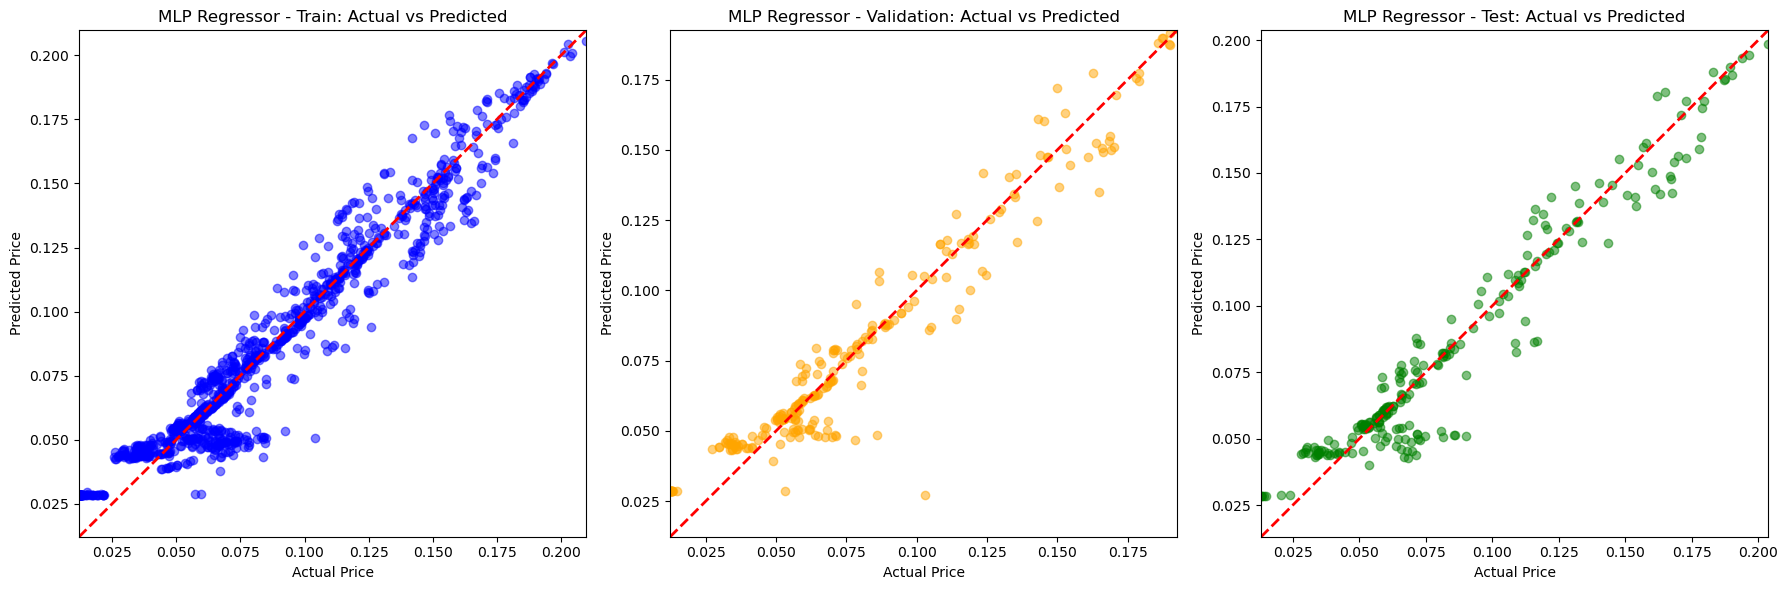

In [123]:
# Vẽ biểu đồ phân tán cho tập train, validation và test với MLP
plt.figure(figsize=(18, 6))

# Tập train
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('MLP Regressor - Train: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(y_train.min(), y_train.max())
plt.ylim(y_train.min(), y_train.max())

# Tập validation
plt.subplot(1, 3, 2)
plt.scatter(y_validation, y_validation_pred, alpha=0.5, color='orange')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'r--', lw=2)
plt.title('MLP Regressor - Validation: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(y_validation.min(), y_validation.max())
plt.ylim(y_validation.min(), y_validation.max())

# Tập test
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('MLP Regressor - Test: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())

plt.tight_layout()
plt.show()


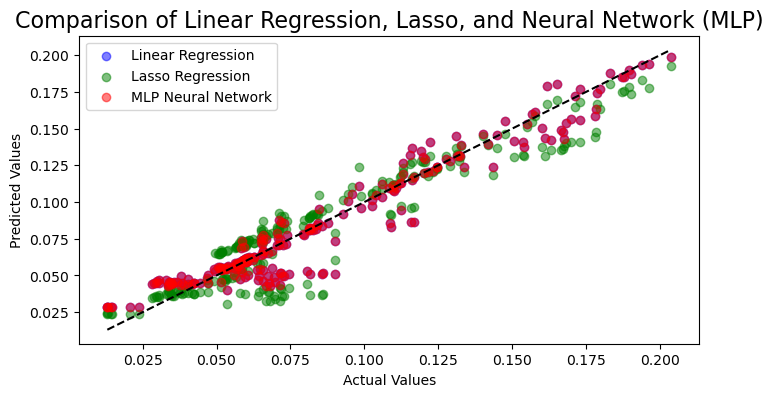

In [133]:
# Biểu đồ đánh giá cả 3 mô hình
import matplotlib.pyplot as plt
import numpy as np

# Tạo figure
plt.figure(figsize=(8, 4))
plt.title('Comparison of Linear Regression, Lasso, and Neural Network (MLP)', fontsize=16)

# Vẽ scatter plot cho từng mô hình
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_test_pred_lasso, color='green', alpha=0.5, label='Lasso Regression')
plt.scatter(y_test, mlp_model.predict(X_test_scaled), color='red', alpha=0.5, label='MLP Neural Network')

# Vẽ đường tham chiếu y = x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--')

# Cấu hình trục và nhãn
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()